## 앙상블 부스팅 알고리즘 GBM 실습

- features.txt

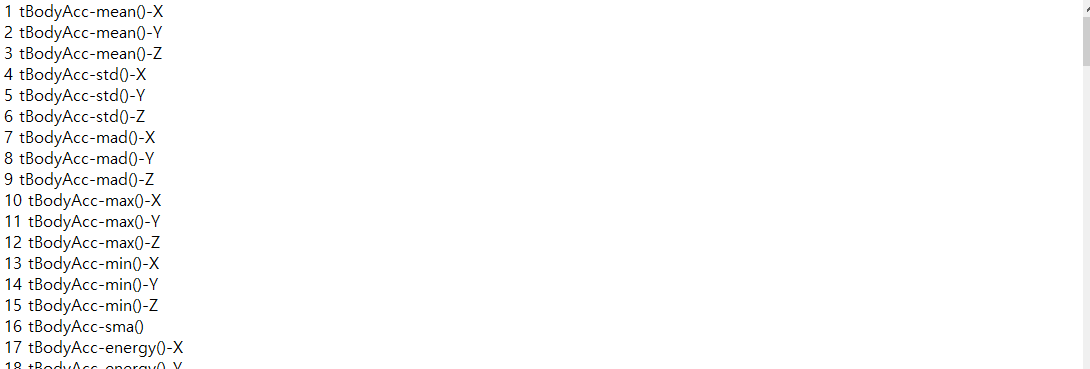

In [17]:
import pandas as pd

## sep='\s+' => 데이터가 위와 같이 공백으로 분리되어 있음.
feature_name_df = pd.read_csv('/content/drive/MyDrive/파이썬 머신러닝 완벽 가이드/data/human_activity/features.txt', sep='\s+', header=None, names=['column_index', 'column_name'])
feature_name_df.head(5)

,column_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y


- features.txt에서 중복된 feature명 처리

In [23]:
## 중복 feature명에 대해서 원본 feature 명에 '_1(또는2)'를 추가로 부여하는 함수인 get_new_feature_name_df() 선언

def get_new_feature_name_df(old_feature_name_df):

    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    print(feature_dup_df)
    feature_dup_df = feature_dup_df.reset_index()
    print(feature_dup_df)

    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0] + '_' + str(x[1]) if x[1] > 0 else x[0], axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)

    return new_feature_name_df

new_feature_name_df = get_new_feature_name_df(feature_name_df)
new_feature_name_df

     dup_cnt
0          0
1          0
2          0
3          0
4          0
..       ...
556        0
557        0
558        0
559        0
560        0

[561 rows x 1 columns]
     index  dup_cnt
0        0        0
1        1        0
2        2        0
3        3        0
4        4        0
..     ...      ...
556    556        0
557    557        0
558    558        0
559    559        0
560    560        0

[561 rows x 2 columns]


,column_index,column_name,dup_cnt
0,1,tBodyAcc-mean()-X,0
1,2,tBodyAcc-mean()-Y,0
2,3,tBodyAcc-mean()-Z,0
3,4,tBodyAcc-std()-X,0
4,5,tBodyAcc-std()-Y,0
...,...,...,...
556,557,"angle(tBodyGyroMean,gravityMean)",0
557,558,"angle(tBodyGyroJerkMean,gravityMean)",0
558,559,"angle(X,gravityMean)",0
559,560,"angle(Y,gravityMean)",0


- 데이터 로드 및 학습, 검증 데이터 준비

In [24]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
import pandas as pd

def get_human_dataset( ):
    
    feature_name_df = pd.read_csv('/content/drive/MyDrive/파이썬 머신러닝 완벽 가이드/data/human_activity/features.txt', sep='\s+', header=None, names=['column_index', 'column_name']) ## features.txt 로드
    new_feature_name_df = get_new_feature_name_df(feature_name_df) ## 중복 feature명 처리 (+ _n 형태)
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()  ## feature name list 생성
    
    ## X data
    X_train = pd.read_csv('/content/drive/MyDrive/파이썬 머신러닝 완벽 가이드/data/human_activity/train/X_train.txt', sep='\s+', names=feature_name)
    X_test = pd.read_csv('/content/drive/MyDrive/파이썬 머신러닝 완벽 가이드/data/human_activity/test/X_test.txt', sep='\s+', names=feature_name)
    
    ## y data
    y_train = pd.read_csv('/content/drive/MyDrive/파이썬 머신러닝 완벽 가이드/data/human_activity/train/y_train.txt', sep='\s+', header=None, names=['action'])
    y_test = pd.read_csv('/content/drive/MyDrive/파이썬 머신러닝 완벽 가이드/data/human_activity/test/y_test.txt', sep='\s+', header=None, names=['action'])
    
    return X_train, X_test, y_train, y_test

## 데이터 로드
X_train, X_test, y_train, y_test = get_human_dataset()

     dup_cnt
0          0
1          0
2          0
3          0
4          0
..       ...
556        0
557        0
558        0
559        0
560        0

[561 rows x 1 columns]
     index  dup_cnt
0        0        0
1        1        0
2        2        0
3        3        0
4        4        0
..     ...      ...
556    556        0
557    557        0
558    558        0
559    559        0
560    560        0

[561 rows x 2 columns]


- GBM 모델 학습 및 검증

In [26]:
## GBM 수행 시간 측정을 위해 시작 시간 설정
start_time = time.time()

## GBM 
gbm_clf = GradientBoostingClassifier(random_state=0)
gbm_clf.fit(X_train, y_train)

## 테스트 데이터셋에 대한 에측 수행
gbm_pred = gbm_clf.predict(X_test)

## 정확도 확인
from sklearn.metrics import accuracy_score
gbm_acc = accuracy_score(y_test, gbm_pred)

## 수행시간 확인
gbm_time = time.time() - start_time

print('acc:', gbm_acc)
print('time:', gbm_time)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


acc: 0.9385816084153377
time: 830.1601512432098
